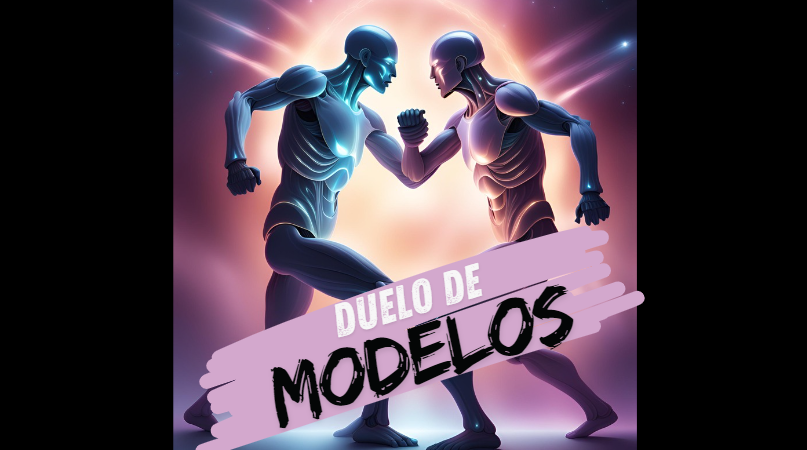

# O duelo entre modelos:

Em ciência de dados, aprendemos diversos tipos de modelos e técnicas para
resolver problemas complexos. No entanto, no dia a dia, escolher o modelo ideal sem testar pode ser desafiador. Por isso, é fundamental para o cientista de dados testar diferentes modelos para o mesmo problema, a fim de identificar qual algoritmo se adequa melhor aos dados específicos. Ferramentas de machine learning, como o Amazon SageMaker e Google Cloud AI Platform facilitam esse processo, automatizando a comparação e avaliação de múltiplos modelos. Este procedimento de teste e validação é uma prática comum e essencial para garantir que utilizamos a abordagem mais eficiente e precisa. Durante esta aula, vamos explorar essa dinâmica, comparando a regressão logística e a árvore de decisão em uma mesma base de dados binária, analisando suas performances e compreendendo suas diferenças e aplicações práticas.

# Dinâmica da aula:
Durante esta aula, vamos explorar essa dinâmica, comparando a árvore de decisão e o random forest para resolver um problema de classificação. Ao final, vamos analisar os resultados para entender os principais fatores que podem ter impactado o desempenho do modelo vencedor. É importante lembrar que o fato de um modelo se sair melhor que o outro nessa análise não significa que ele é sempre superior, mas sim que, para esses dados específicos, ele apresentou melhor performance.

# Conhecendo nossos campeões:

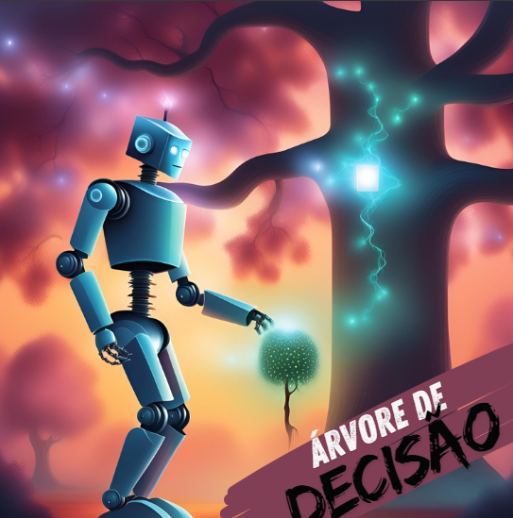

# **Pontos Fortes da Árvore de Decisão**

**Interpretação Simples:** As árvores de decisão são fáceis de entender e interpretar. A lógica por trás das decisões é transparente e pode ser facilmente visualizada.

**Capacidade de Capturar Interações Não Lineares**: Ao contrário de modelos lineares, as árvores de decisão podem capturar interações complexas e não lineares entre variáveis.

**Necessidade Mínima de Pré-processamento de Dados:** Elas não requerem uma extensa normalização ou padronização dos dados.

**Versatilidade:** Podem ser usadas tanto para problemas de classificação quanto de regressão.

# **Pontos Fracos da Árvore de Decisão**

**Propensão ao Overfitting:** As árvores de decisão podem se ajustar excessivamente aos dados de treinamento, especialmente se não forem podadas corretamente.

**Sensibilidade às Pequenas Variações nos Dados:** Pequenas mudanças nos dados podem resultar em uma árvore completamente diferente.

**Desempenho em Dados Complexos:** Em conjuntos de dados com muitas características irrelevantes ou ruidosas, as árvores de decisão podem não performar tão bem quanto outros modelos.

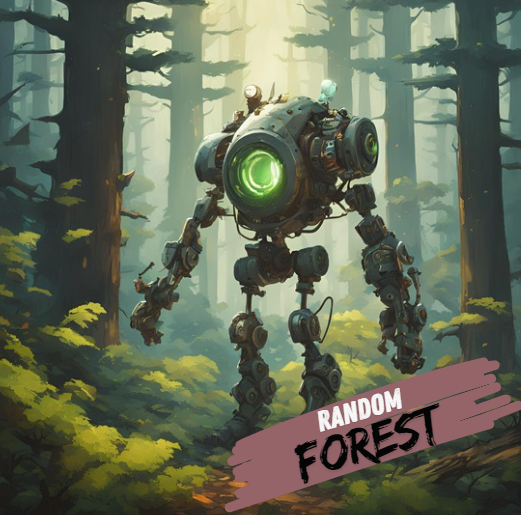

Apresento a vocês: o poderoso Random Forest! Surgido das mentes brilhantes de Leo Breiman em 2001, este modelo revolucionário combina múltiplas árvores de decisão para formar uma verdadeira floresta de conhecimento. Sua técnica de construção com subconjuntos aleatórios de dados e características garante previsões precisas e robustas, evitando o temido overfitting. Com uma precisão impressionante, o Random Forest se destaca tanto em problemas de classificação quanto de regressão, lidando com maestria com grandes volumes de dados e características diversas. Um verdadeiro titã no mundo da ciência de dados!

# **Pontos Fortes do Random Forest**

**Precisão e Robustez:** Combina múltiplas árvores de decisão, proporcionando alta precisão e robustez, reduzindo o overfitting e melhorando a generalização dos modelos.

**Versatilidade:** Funciona bem tanto para problemas de classificação quanto de regressão, sendo aplicável a uma ampla gama de cenários de análise de dados.

**Gerenciamento de Dados Complexos:** Capaz de lidar com grandes volumes de dados e características diversas, além de ser resistente a outliers e variáveis ruidosas.

# **Pontos Fracos do Random Forest**

**Complexidade Computacional:** Requer mais poder computacional e memória em comparação com modelos mais simples, especialmente ao lidar com grandes conjuntos de dados.

**Interpretação Difícil:** A natureza do modelo, composto por múltiplas árvores, torna a interpretação e visualização dos resultados mais complexa do que em modelos de árvore de decisão única.

**Risco de Overfitting em Dados Pequenos:** Embora reduza o overfitting em dados grandes, pode ser suscetível ao overfitting quando aplicado a conjuntos de dados menores ou insuficientemente diversificados.

# Arena do duelo (Nossa base de dados):

Para nosso duelo entre a Árvore de Decisão e a Regressão Logística, utilizaremos a famosa base de dados do Titanic. Esta base de dados é amplamente utilizada em competições e desafios de machine learning devido à sua simplicidade e ao fato de ser um problema de classificação binária claro: prever se um passageiro sobreviveu ou não ao naufrágio do Titanic, com base em características como idade, gênero, classe do bilhete, entre outras.

In [10]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas para pré-processamento e divisão de dados
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Bibliotecas para os modelos de machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Bibliotecas para métricas de avaliação
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [11]:
train_df = pd.read_csv('train (1).csv')
test_df = pd.read_csv('test (1).csv')

In [12]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


class: Classe do bilhete do passageiro (1 = 1ª classe, 2 = 2ª classe, 3 = 3ª classe). Esta coluna é uma variável ordinal que indica a classe socioeconômica do passageiro.

SibSp: Número de irmãos/cônjuges a bordo. Esta coluna indica quantos irmãos e/ou cônjuges a pessoa tinha no navio.

Parch: Número de pais/filhos a bordo. Esta coluna indica quantos pais e/ou filhos a pessoa tinha no navio.

Fare: Tarifa paga pelo bilhete. Esta coluna indica o valor da passagem que o passageiro pagou para embarcar no Titanic.


Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton). Esta coluna indica o porto onde o passageiro embarcou no navio.

In [14]:
# Preenchendo valores nulos em Age com a média
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

/var/folders/pr/wx16k7494f1grpgyylpct75h0000gn/T/ipykernel_4629/217807486.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
/var/folders/pr/wx16k7494f1grpgyylpct75h0000gn/T/ipykernel_4629/217807486.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [15]:
# 1. Para a variável 'Sex', podemos usar Label Encoding, pois há apenas duas categorias
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [16]:
# 2. Para a variável 'Embarked', podemos usar One-Hot Encoding, pois há mais de duas categorias
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')

In [17]:
# 3. Para a variável 'Cabin', podemos apenas criar uma nova variável indicando se a cabine é conhecida ou não
train_df['Cabin_known'] = train_df['Cabin'].notna().astype(int)
test_df['Cabin_known'] = test_df['Cabin'].notna().astype(int)

# Agora podemos descartar a coluna 'Cabin' original
train_df = train_df.drop(columns=['Cabin'])
test_df_teste = test_df.drop(columns=['Cabin'])

In [18]:
train_df = train_df.drop(columns=['Name','Ticket'])

In [19]:
variaveis = ['Sex', 'Cabin_known','Fare','Pclass']

In [20]:
# Separando as variáveis dependentes (Y) e independentes (X) no conjunto de treino
X = train_df[variaveis]
y = train_df['Survived']

X_test = test_df[variaveis]

Notem que a base não tem o Y test, pois após realizarmos as predicões nós submetemos elas na competição para descobrir nossa pontuação!

# Duelo 1:
Pouco pré processamento

# Árvore de Decisão:

In [21]:
# Criando o modelo da Arvore
arvore_duelo1 = DecisionTreeClassifier(random_state=42)

In [22]:
# Treinando o modelo de Arvore com os dados de treino
arvore_duelo1.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [23]:
# Fazendo previsões com o modelo treinado nos dados de treino
Y_arvore_duelo1 = arvore_duelo1.predict(X)

In [24]:
relatorio = classification_report(y, Y_arvore_duelo1)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       549
           1       0.92      0.84      0.88       342

    accuracy                           0.91       891
   macro avg       0.91      0.90      0.91       891
weighted avg       0.91      0.91      0.91       891



# Random Forest:

In [25]:
# Criando o modelo da floresta
rf_duelo1 = RandomForestClassifier(random_state=42)

In [26]:
# Treinando o modelo da floresta com os dados de treino
rf_duelo1.fit(X, y)

RandomForestClassifier(random_state=42)

In [27]:
# Fazendo previsões com o modelo treinado nos dados de treino
Y_floresta_duelo1 = rf_duelo1.predict(X)

In [28]:
relatorio = classification_report(y, Y_floresta_duelo1)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       549
           1       0.91      0.86      0.88       342

    accuracy                           0.91       891
   macro avg       0.91      0.90      0.91       891
weighted avg       0.91      0.91      0.91       891



Nossos modelos, para a base de treino, tem tido desempenho bem próximos, notem que a melhora foi o recall na classe 1, significa que, entre todas as instâncias que realmente pertencem à classe 1, o modelo foi capaz de identificar corretamente 86% delas.

# Duelo 2:
Pré Processamento

Embora o Random Forest seja menos dependente de pré-processamento, como padronização e balanceamento, vale a pena testar esses processos para verificar possíveis melhorias no desempenho.
Isso pode ajudar a avaliar se esses processos adicionais oferecem vantagens significativas no desempenho do Random Forest em comparação com modelos como Regressão Logística e Árvores de Decisão, que geralmente se beneficiam mais desses pré-processamentos.

In [29]:
# Balanceando os dados com SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X, y)

In [30]:
# Padronizando os dados
scaler = StandardScaler()
# Ajustando e transformando os dados de treino balanceados
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

In [31]:
print(f"Tamanho do conjunto de treino balanceado: {X_train_balanced_scaled.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test_scaled.shape[0]}")

Tamanho do conjunto de treino balanceado: 1098
Tamanho do conjunto de teste: 418


In [32]:
print("Distribuição das classes antes do balanceamento:")
print(y.value_counts())

Distribuição das classes antes do balanceamento:
Survived
0    549
1    342
Name: count, dtype: int64


In [33]:
print("\nDistribuição das classes depois do balanceamento:")
print(Y_train_balanced.value_counts())


Distribuição das classes depois do balanceamento:
Survived
0    549
1    549
Name: count, dtype: int64


# Árvore de Decisão:

In [34]:
arvore_duelo2 = DecisionTreeClassifier(random_state=42)

In [35]:
arvore_duelo2.fit(X_train_balanced_scaled, Y_train_balanced)

DecisionTreeClassifier(random_state=42)

In [36]:
Y_arvore_duelo2 = arvore_duelo2.predict(X_train_balanced_scaled)

In [37]:
relatorio = classification_report(Y_train_balanced, Y_arvore_duelo2)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       549
           1       0.94      0.89      0.91       549

    accuracy                           0.92      1098
   macro avg       0.92      0.92      0.92      1098
weighted avg       0.92      0.92      0.92      1098



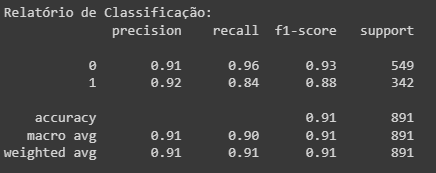

Recall e Precision: A padronização e o balanceamento frequentemente melhoram a sensibilidade (recall) e a precisão (precision) para a classe 1, tornando o modelo mais eficaz em identificar corretamente as instâncias dessa classe.

Métricas de Desempenho: Pode haver uma leve queda nas métricas de desempenho, como precisão e recall, para a classe 0. Isso ocorre porque o balanceamento faz o modelo prestar mais atenção à classe 1, o que pode resultar em um leve comprometimento na identificação correta da classe 0.

# Random Forest:

In [38]:
floresta_duelo2 = RandomForestClassifier(random_state=42)

In [39]:
floresta_duelo2.fit(X_train_balanced_scaled, Y_train_balanced)

RandomForestClassifier(random_state=42)

In [40]:
Y_floresta_duelo2 = floresta_duelo2.predict(X_train_balanced_scaled)

In [41]:
relatorio = classification_report(Y_train_balanced, Y_floresta_duelo2)
print("Relatório de Classificação:")
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       549
           1       0.93      0.90      0.92       549

    accuracy                           0.92      1098
   macro avg       0.92      0.92      0.92      1098
weighted avg       0.92      0.92      0.92      1098



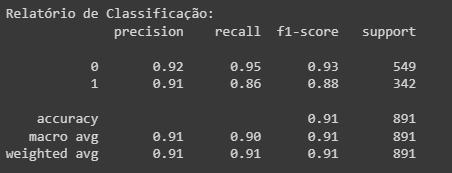

Vemos que o Random forest teve uma melhora ainda mais significativa com a classe 1,  mostrando maior resiliência e capacidade de adaptação ao pré-processamento de dados, como padronização e balanceamento.
Então mesmo que saibamos que o random forest se adapta melhor a dados desbalanceados e despadronizados, aplicar essas técnicas pode melhorar nosso modelo ainda mais!

# Duelo 3:
Melhorar Hyperparametros

Essa comparação permitirá avaliar qual modelo, Árvore de Decisão ou Random Forest, responde melhor às melhorias proporcionadas pelo ajuste fino dos hiperparâmetros. É esperado que o Random Forest, devido à sua natureza mais complexa e robusta, apresente uma melhoria mais significativa, mas a Árvore de Decisão pode se beneficiar mais de ajustes específicos dependendo dos dados.

# Árvore de Decisão:

In [42]:
arvore_duelo3 = DecisionTreeClassifier(random_state=42)

In [43]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Critério de divisão
    'max_depth': [None, 10, 20, 30, 40, 50, 5],  # Profundidade máxima da árvore
    'min_samples_split': [2, 10, 20, 5, 30],  # Número mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 5, 10, 2, 15],  # Número mínimo de amostras em um nó folha
}

In [44]:
grid_search_arvore = GridSearchCV(arvore_duelo3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#Ajustando o Grid Search aos dados de treino
grid_search_arvore.fit(X_train_balanced_scaled, Y_train_balanced)

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50, 5],
                         'min_samples_leaf': [1, 5, 10, 2, 15],
                         'min_samples_split': [2, 10, 20, 5, 30]},
             scoring='accuracy')

In [45]:
# Melhores parâmetros encontrados
best_params_arvore = grid_search_arvore.best_params_
print(f"Melhores parâmetros: {best_params_arvore}")

Melhores parâmetros: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 20}


In [46]:
#Melhor modelo
best_arvore_model = grid_search_arvore.best_estimator_
best_arvore_model.fit(X_train_balanced_scaled, Y_train_balanced)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=20, random_state=42)

In [47]:
Y_pred_arvore = best_arvore_model.predict(X_train_balanced_scaled)
report_arvore = classification_report(Y_train_balanced, Y_pred_arvore)
print("Relatório de Métricas - Modelo com Grid Search (Árvore de Decisão):\n", report_arvore)

Relatório de Métricas - Modelo com Grid Search (Árvore de Decisão):
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       549
           1       0.90      0.83      0.87       549

    accuracy                           0.87      1098
   macro avg       0.87      0.87      0.87      1098
weighted avg       0.87      0.87      0.87      1098



In [48]:
Y_pred_tree = best_arvore_model.predict(X_test_scaled)

In [49]:
Y_pred_tree

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [50]:
sub_tree = pd.Series(Y_pred_tree, index=test_df['PassengerId'], name = 'Survived')

In [51]:
sub_tree

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 418, dtype: int64

In [52]:
sub_tree.to_csv("submissao_tree.csv" , header=True)

# Random Forest:

In [53]:
floresta_duelo3 = RandomForestClassifier(random_state=42)

In [54]:
param_grid = {
    'n_estimators': [50, 100, 200, 20],  # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30, 5],  # Profundidade máxima de cada árvore
    'min_samples_split': [2, 5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4, 6],  # Número mínimo de amostras necessárias para estar em um nó folha
    'max_features': ['sqrt', 'log2', None]  # Número máximo de recursos considerados para dividir um nó
}

In [55]:
grid_search_floresta = GridSearchCV(floresta_duelo3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [56]:
# Executando o Randomized Search
grid_search_floresta.fit(X_train_balanced_scaled, Y_train_balanced)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 20]},
             scoring='accuracy')

In [57]:
best_params_floresta = grid_search_floresta.best_params_
print(f"Melhores parâmetros: {best_params_floresta}")

Melhores parâmetros: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [58]:
best_floresta_model = grid_search_floresta.best_estimator_
best_floresta_model.fit(X_train_balanced_scaled, Y_train_balanced)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [59]:
Y_pred_arvore = best_floresta_model.predict(X_train_balanced_scaled)
report_arvore = classification_report(Y_train_balanced, Y_pred_arvore)
print("Relatório de Métricas - Modelo com Grid Search (Árvore de Decisão):\n", report_arvore)

Relatório de Métricas - Modelo com Grid Search (Árvore de Decisão):
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       549
           1       0.92      0.87      0.89       549

    accuracy                           0.89      1098
   macro avg       0.90      0.89      0.89      1098
weighted avg       0.90      0.89      0.89      1098



In [60]:
Y_pred_forest_sub = floresta_duelo2.predict(X_test_scaled)

In [61]:
Y_pred_forest_sub

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [62]:
sub_forest = pd.Series(Y_pred_forest_sub, index=test_df['PassengerId'], name = 'Survived')

In [63]:
sub_forest.to_csv("sub_forest.csv" , header=True)